In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import string

from scipy.io import loadmat
from sklearn import svm
from itertools import product
from pathlib import Path
from re import sub, split, findall
from nltk.stem.porter import PorterStemmer

In [2]:
# Images directory

figsdir = Path.cwd() / 'ex6figs'
figsdir.mkdir(parents=True, exist_ok=True);

In [3]:
# Data directory

datadir = Path.cwd() / 'data/ex6'

# Support Vector Machines

## Example dataset 1

In [4]:
data = loadmat(datadir / 'ex6data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
x = data['X']
y = data['y'].ravel();

print('x: {}\ny: {}'.format(x.shape, y.shape))

x: (51, 2)
y: (51,)


In [6]:
def plot_data(x, y, ax=None):
    if ax == None:
        ax = plt.gca()
    
    pos = (y == 1)
    neg = (y == 0)

    ax.plot(x[pos, 0], x[pos, 1], '+', x[neg, 0], x[neg, 1], 'o')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.legend(['pos', 'neg'], loc='best')

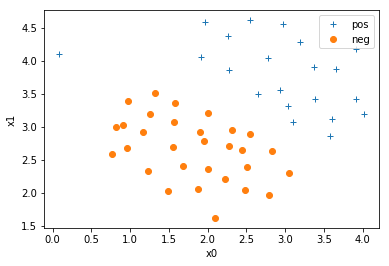

In [7]:
plot_data(x, y)
plt.savefig(figsdir / 'data.png', bbox_inches='tight')

In [8]:
def make_meshgrid(x, y, pad, step=.02):
    x_min, x_max = x.min() - pad, x.max() + pad
    y_min, y_max = y.min() - pad, y.max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    
    return xx, yy

In [9]:
def plot_contours(ax, clf, xx, yy, **params):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, z, **params)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

In [10]:
clfs = (svm.SVC(C=1, degree=1, kernel='linear'), svm.SVC(C=100, degree=1, kernel='linear'))
[clf.fit(x, y) for clf in clfs]

[SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)]

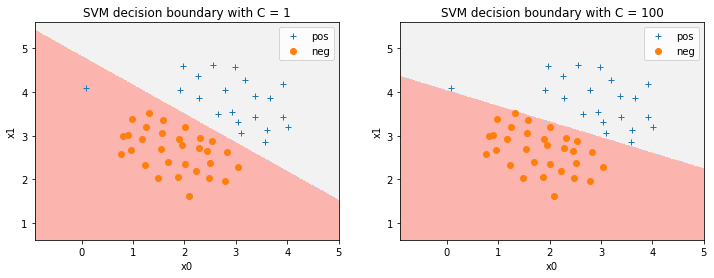

In [11]:
x0, x1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(x0, x1, pad=1)
_, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, clf in zip(axes, clfs):
    plot_data(x, y, ax=ax)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.Pastel1)
    ax.set_title('SVM decision boundary with C = {}'.format(clf.C))
    
plt.savefig(figsdir / 'svm_linear_decision_boundaries.png', bbox_inches='tight')

## Example dataset 2

In [12]:
def gaussian_kernel(x0, x1, sigma):
    return np.exp(-np.sum(np.square(x0 - x1)) / (2 * np.square(sigma)))

In [13]:
x0 = np.array([1, 2, 1])
x1 = np.array([0, 4, -1])
sigma = 2;

print('Gaussian kernel between {}, {}, sigma = {}: {}\n(this value should be about 0.324652))'
      .format(x0, x1, sigma,gaussian_kernel(x0, x1, sigma)))

Gaussian kernel between [1 2 1], [ 0  4 -1], sigma = 2: 0.32465246735834974
(this value should be about 0.324652))


In [14]:
data = loadmat(datadir / 'ex6data2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [15]:
x = data['X']
y = data['y'].ravel()

print('x: {}\ny: {}'.format(x.shape, y.shape))

x: (863, 2)
y: (863,)


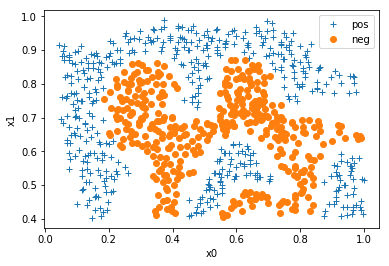

In [16]:
plot_data(x, y)

plt.savefig(figsdir / 'data2.png', bbox_inches='tight')

In [17]:
# gamma = 1 / (2 * sigma**2)
clf = svm.SVC(C=1, kernel='rbf', gamma=50)
clf.fit(x, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

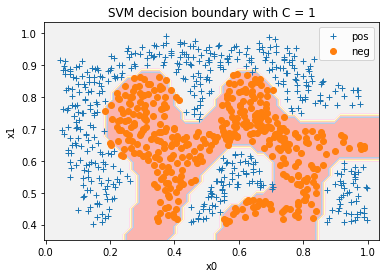

In [18]:
x0, x1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(x0, x1, pad=0.05)

plot_data(x, y)
plot_contours(plt.gca(), clf, xx, yy, cmap=plt.cm.Pastel1)
plt.title('SVM decision boundary with C = {}'.format(clf.C))

plt.savefig(figsdir / 'svm_rbf_decision_boundary_data2.png', bbox_inches='tight')

## Example dataset 3

In [19]:
data = loadmat(datadir / 'ex6data3.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [20]:
x = data['X']
y = data['y'].ravel()

x_val = data['Xval']
y_val = data['yval'].ravel()

print('x: {}\ny: {}'.format(x.shape, y.shape))
print('x_val: {}\ny_val: {}'.format(x_val.shape, y_val.shape))

x: (211, 2)
y: (211,)
x_val: (200, 2)
y_val: (200,)


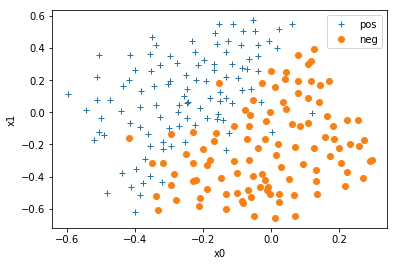

In [21]:
plot_data(x, y)

plt.savefig(figsdir / 'data3.png', bbox_inches='tight')

In [22]:
c_val = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
sigma_val = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
gamma_val = 1 / (2 * np.square(sigma_val))

best_C = c_val[0]
best_gamma = gamma_val[0]
clf = svm.SVC(C=best_C, kernel='rbf', gamma=best_gamma)
clf.fit(x, y)
pred = clf.predict(x)
prediction_error = np.mean(pred != y)
best_clf = clf

for c, gamma in product(c_val[1:], gamma_val[1:]):
    clf = svm.SVC(C=c, kernel='rbf', gamma=gamma)
    clf.fit(x, y)
    pred = clf.predict(x_val)
    prediction_error_temp = np.mean(pred != y_val)

    if prediction_error_temp < prediction_error:
        prediction_error = prediction_error_temp
        best_C = c
        best_gamma = gamma
        best_clf = clf
        
best_C, best_gamma

(1.0, 49.99999999999999)

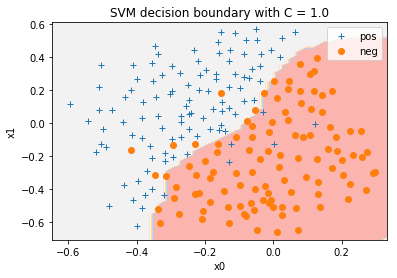

In [23]:
x0, x1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(x0, x1, pad=0.05)

plot_data(x, y)
plot_contours(plt.gca(), best_clf, xx, yy, cmap=plt.cm.Pastel1)
plt.title('SVM decision boundary with C = {}'.format(best_clf.C))

plt.savefig(figsdir / 'svm_rbf_decision_boundary_data3.png', bbox_inches='tight')

# Spam classification

In [24]:
with open(datadir / 'emailSample1.txt') as email_sample:
    email_text = email_sample.read()

In [25]:
def process_email(text, vocab):
    text = text.lower() # Lower case
    text = sub(r'<[^<>]+>', '', text) # Strip HTML tags
    text = sub(r'[0-9]+', 'number', text) # Normalize numbers
    text = sub(r'(http|https)://[^\s]*', 'httpaddr', text) # Normalize URLs
    text = sub(r'[^\s]+@[^\s]+', 'emailaddr', text) # Normalize email addresses
    text = sub(r'[$]+', 'dollar', text) # Normalize dollar signs
    
    tokens = split('\W+', text) # Remove all non-word characters
    stemmer = PorterStemmer() # Stemming
    words = [stemmer.stem(token) for token in tokens if len(token) > 0]
    
    return [vocab.index(word) for word in words if word in vocab]

In [26]:
with open(datadir / 'vocab.txt') as vocab_file:
    vocab = vocab_file.readlines()
    
vocab = [findall(r'[a-zA-Z]+', l.strip())[0] for l in vocab]
word_indices = process_email(email_text, vocab)

print(word_indices)

[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1892, 1363, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 478, 1892, 1509, 798, 1181, 1236, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]


In [27]:
def email_features(word_indices):
    return [1 if ind in word_indices else 0 for ind in range(1899)]

In [28]:
features = email_features(word_indices)
features.count(1)

45

In [29]:
train_data = loadmat(datadir / 'spamTrain.mat')
test_data = loadmat(datadir / 'spamTest.mat')
train_data.keys(), test_data.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest']))

In [30]:
x = train_data['X']
y = train_data['y'].ravel()

x_test = test_data['Xtest']
y_test = test_data['ytest'].ravel()

print('x: {}\ny: {}'.format(x.shape, y.shape))
print('x_test: {}\ny_test: {}'.format(x_test.shape, y_test.shape))

x: (4000, 1899)
y: (4000,)
x_test: (1000, 1899)
y_test: (1000,)


In [31]:
clf = svm.SVC(C=0.1, kernel='linear')
clf.fit(x, y)

train_pred = clf.predict(x)
print('Training accuracy: {:.2f}%'.format(np.mean(train_pred == y) * 100))

test_pred = clf.predict(x_test)
print('Test accuracy: {:.2f}%'.format(np.mean(test_pred == y_test) * 100))

Training accuracy: 99.83%
Test accuracy: 98.90%


In [32]:
weights = np.sort(clf.coef_, axis=None)
idx = np.argsort(clf.coef_, axis=None)
weights[::-1].sort()
idx[::-1].sort()

top_predictors = [(vocab[idx[i]], weights[i]) for i in range(15)]

print('Top predictors (predictor, weight):')
for p, w in top_predictors:
    print((p, w))

Top predictors (predictor, weight):
('zip', 0.5006137361746403)
('zero', 0.46591639068888796)
('zdnet', 0.4228691170610412)
('yourself', 0.3836216017940651)
('your', 0.367710398245535)
('young', 0.3450640979461706)
('you', 0.3236320357963838)
('york', 0.2697241060373996)
('yet', 0.2672977146177069)
('yesterdai', 0.26116888670014904)
('year', 0.2572981979518163)
('yeah', 0.2539414551595328)
('ye', 0.25346652431419936)
('yahoo', 0.2482969904556866)
('xp', 0.24640435783158998)
